In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)
meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)

print('cluster labels 유형', np.unique(cluster_labels))

# 대역폭을 0.8로 맞췄더니 cluster가 6개가 나왔다

cluster labels 유형 [0 1 2 3 4 5]


In [5]:
# 대역폭을 1로

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)

print('cluster labels 유형', np.unique(cluster_labels))

cluster labels 유형 [0 1 2]


* 대역폭이 엄청 민감하다는 것을 알 수 있다.
    - 대역폭 0.8로 설정하니까 6개라는 많은 군집개수가 생겼다. 
    - 그래서 대역폭 1로 올려주었더니, 군집 개수가 3개가 나왔다.


* Estimate_bandwidth()를 하면 적절한 대역폭을 반환해준다.
     - BUT 그 역할을 하지 못할 때가 있기 때문에 
     - Make_blobs 를 통해 임의로 데이터셋을 많이 만들고, 평균이동을 하는 실습과정을 가졌으면 좋겠다.

In [7]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [11]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

best_bandwidth=estimate_bandwidth(X)
meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)

print('cluster labels 유헝:', np.unique(cluster_labels))

cluster labels 유헝: [0 1 2]


- Estimate_bandwidth()를 통한 군집화 시각화

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# cluster_centers_ 속성으로 군집 중심 좌표를 표시
centers = meanshift.cluster_centers_
print(centers)

[[ 0.91576801  4.43718522]
 [ 1.93418334  0.80590247]
 [-1.67292851  2.87796673]]


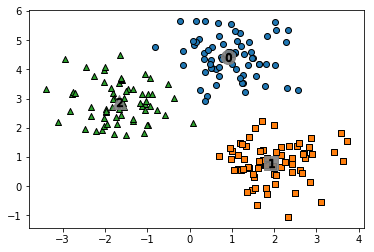

In [21]:
markers=['o', 's', '^', 'x', '*']

clusterDF['meanshift_label']  = cluster_labels
unique_labels = np.unique(cluster_labels)

# 군집별로 시각화
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [22]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
